In [2]:
# Author: Brandon Botzer
# Date: 3/10/2024
# Class: Penn State - AI 879

Tasks:

1) Implement the Canny, Sobel, Prewitt, and Roberts 4 edge detectors.
2) Apply on the image nature.jpg, show results of 4 edge detectors.
3) Explain what is the difference between them.

In [3]:
# Imports for functions

from PIL import Image

import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import cv2 as cv


# Showing the results of scipy computations
import pandas as pd

cv.__version__, ski.__version__

('4.8.1', '0.22.0')

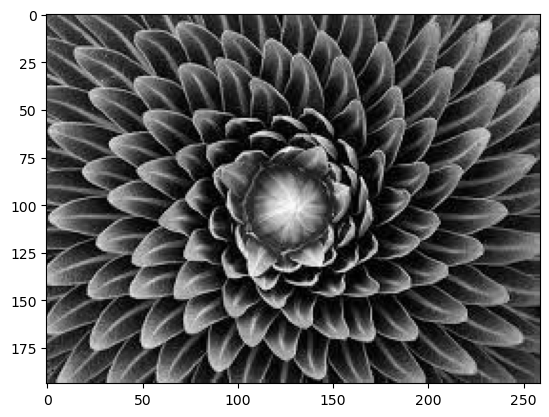

In [4]:
# Grab the nature image and convert to grayscale
nature = ski.io.imread('nature.jpg')
nat_gray = ski.color.rgb2gray(nature)
plt.imshow(nat_gray, cmap='gray');

# Sobel Operator

The Sobel method uses two 3x3 kernels to find edges in the x and y direction.

These kernels are: [[1 0 -1], [2 0 -2], [1 0 -1]] and [[1 2 1], [0 0 0], [-1 -2 -1]].

The gradients from these two kernels can then be added quadrature to find the overall gradient magnitude.

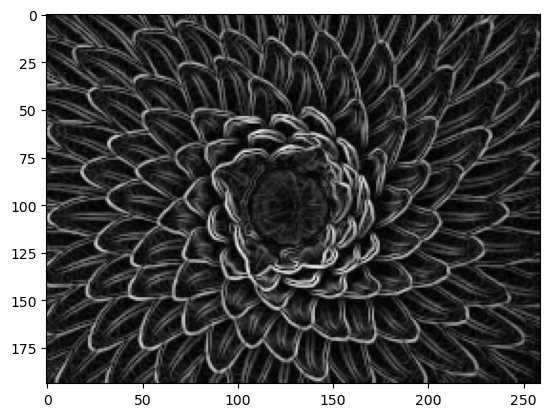

In [5]:
# Sobel Filter

# The Sobel filter is a linear filter that looks at ...

nat_gray_sobel = ski.filters.sobel(nat_gray)
plt.imshow(nat_gray_sobel, cmap='gray');

# Canny Edge Detection

 Canny, J., A Computational Approach To Edge Detection, IEEE Trans. Pattern Analysis and Machine Intelligence, 8:679-714, 1986 DOI:10.1109/TPAMI.1986.4767851

1. Canny works by smoothing the image with a Gaussian.
2. Applies the Sobel operators to get gradients in both the x and y directions.
3. Use the inverse tangent formula to computer the gradients in the x and y direction.
4. It thins edges to 1 pixel wide curves (this is done cleverly to find horizontal, vert, diag, and anti-diag edges)
5. Hysteresis thresholding is then done using an upper threshold and a path to an edge between the upper and lower thresholds

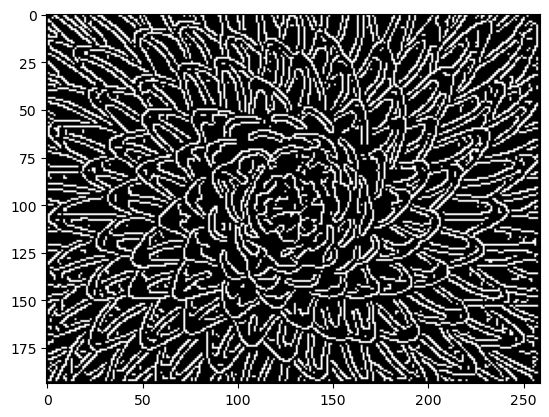

In [6]:
# Apply the Canny Edge Detection

nat_gray_canny = ski.feature.canny(nat_gray)
plt.imshow(nat_gray_canny, cmap='gray');

# Roberts Cross operator

The Roberts Cross filter uses a pair of convolutions kernels: [[1 0], [0 -1]] and [[0, 1], [-1, 0]].

These kernels do well at finding edges that are at 45 degrees (as opposed to horizontal and vertical x and y edges) and are combined in quadrature to find the gradient maximum.
They can also be added in pseudo-convolutions to run even faster: https://homepages.inf.ed.ac.uk/rbf/HIPR2/roberts.htm

The Roberts Cross filter is highly efficient and quick to compute but given the small 2x2 convolution kernels, it is sensitive to noise.

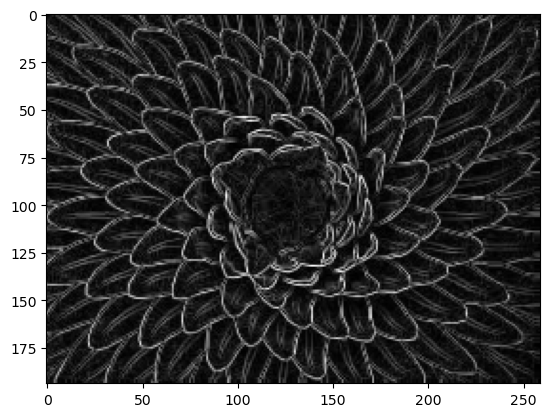

In [7]:
# Roberts Cross

nat_gray_roberts = ski.filters.roberts(nat_gray)
plt.imshow(nat_gray_roberts, cmap='gray');

# Prewitt Operator

The Prewitt Operator makes use of two 3x3 convolution kernels, one each for the x and y dirctions.

They are given by: [[-1 0 1], [-1 0 1], [-1 0 1]] and [[-1 -1 -1], [0 0 0 ], [1 1 1]].

As the other operators, once the gradients in x and y are found, the total gradient magnitude is found by adding the x and y gradients in quadrature.

As noted in the Scikit-Image source code (https://github.com/scikit-image/scikit-image/blob/v0.22.0/skimage/filters/edges.py#L435-L490),
it should be noted that the Prewitt Operator is slightly dependent on edge direction.  The Sobel operator has better rotatoinal invariance than the Prewitt operator.


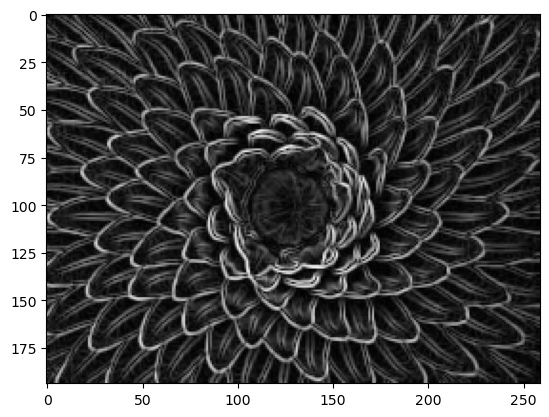

In [8]:
# Prewitt Transform

nat_gray_prewitt = ski.filters.prewitt(nat_gray)
plt.imshow(nat_gray_prewitt, cmap='gray');

# Plotting All Four Operators for Comparision

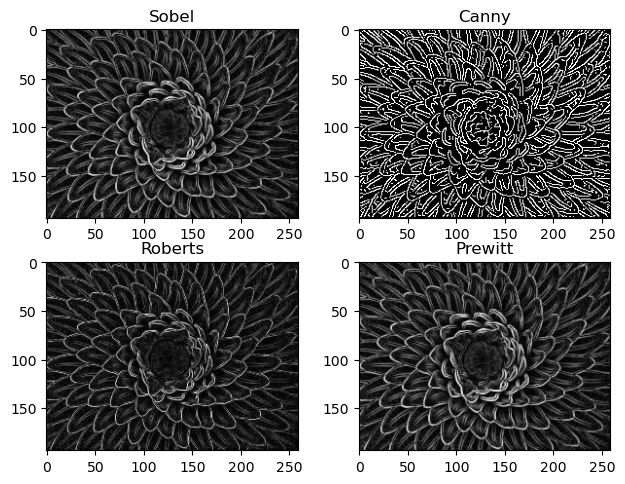

In [16]:
# Plot all four images


fig, ax = plt.subplots(2,2)
plt.tight_layout()

ax[0,0].imshow(nat_gray_sobel, cmap='gray')
ax[0,0].set_title('Sobel')

ax[0,1].imshow(nat_gray_canny, cmap='gray')
ax[0,1].set_title('Canny')

ax[1,0].imshow(nat_gray_roberts, cmap='gray')
ax[1,0].set_title('Roberts')

ax[1,1].imshow(nat_gray_prewitt, cmap='gray')
ax[1,1].set_title('Prewitt');

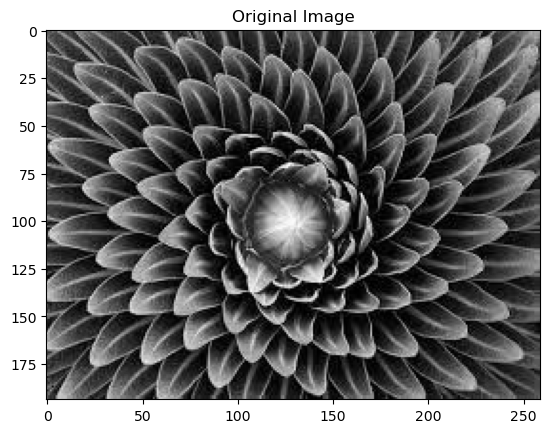

In [20]:
# The original again:
plt.imshow(nat_gray, cmap='gray')
plt.title('Original Image');

It can be seen that given the small kernels of the Roberts, the gradients are not as strong as the Prewitt and Sobel edges.  While Sobel and Prewitt are similar, the sobel does a better job at resolving some edges at specific orientations.

Naturally, with the Sobel, Prewitt, and Roberts Cross, the convolution kernels can be normalized for computational speed.

The Canny operator, given the Gaussian bluring and hysteresis thresholding does the best job at finding hard edges while eliminating noisy edges.  These noisy edges would be gradients that occur within the leaves of the image.